# Supervised ML & Sentiment Analysis

We are going to learn about supervised machine learning and specifically we are going to learn about logistic regression. In order for you to implement logistic regression, we need to take a few steps. In **supervised machine learning** you have input features $X$ and a set of labels $Y$. Now to make sure we are getting the most accurate predictions based on the data, our goal is to minimize the error rates or cost as much as possible. To do so, we are going to run your prediction function which takes in parameters data to map your features to output labels $\hat{Y}$. Now the best mapping from features to labels is achieved when the difference between the expected values $Y$ and the predicted values $\hat{Y}$ is minimized. The *cost function* does this by comparing how closely the output $\hat{Y}$ is to the label $Y$. Finally, we can update the parameters and repeat the whole process until your cost is minimized, as illustred in the diagram below.

<img src="images/supervised_ml.svg" width="60%"/>

So let's take a look at the supervised machine learning classification task of sentiment analysis. In this example you have the tweet, let's say, 

> I'm happy because I'm learning NLP.

And the objective in this task is to predict whether a tweet has a positive or a negative sentiment. We do this by starting with a training set where tweets with a positive sentiment have a label of `1`, and the tweets with a negative sentiment have a label of `0`. For this task you will use a logistic regression classifier which assigns its observations to two distinct classes. To get started building a logistic regression classifier that's capable of predicting sentiments of an arbitrary tweet, we
- First process the raw tweets in the training set and extract useful features. 
- Then we train the logistic regression classifier while minimizing the cost. 
- Finally we are able to make predictions. Thus, given the tweet, we should classify it to either be positive or negative. 

# Vocabulary & Feature Extraction

In order to represent a text as a vector, we first have to build a vocabulary $V$ that will allow us to encode any text or any tweet as an array of numbers. To do so, consider a list of tweets, visually it would look like this `[tweet_1, tweet_2, ..., tweet_m]`, where `tweet_1 = "I'm happy because I am learning NLP"`, ..., `tweet_m = "I hated the movie"`. Then the vocabulary $V$ would be the list of unique words from this list of tweets. To build that list, we have to go through all the words from all the tweets and save every new word that appears in the search. In this example, we have the words "I", then the word, "am" and "happy", "because", and so forth. Note that the word "I" and the word "am" would not be repeated in the vocabulary. We would end up with a vocabulary as:

```
V = ['I', 'am', 'happy', 'because', 'learning', 'NLP', ..., 'hated', 'the', 'movie']
```

Let's take these tweets and extract features using the vocabulary. To do so, we have to check if every word from your vocabulary appears in the tweet. If it does like in the case of the word "I", we would assign a value of `1` to that feature. If it does not appear, we would assign a value of `0`, as shown below. 

<img src="images/feature_extraction.svg" width="60%"/>

In this example above, the representation of your tweet would have six ones and many zeros. These zeros correspond to every unique word from your vocabulary that is not in the tweet. This type of representation with a small relative number of non-zero values is called a **sparse representation**. This representation would have a number of features equal to the size of your entire vocabulary $n=|V|$. This would have a lot of features equal to `0` for every tweet. With the sparse representation, a logistic regression model would have to learn $\theta_{n+1}$ parameters, where $n$ would be equal to the size of your vocabulary. 

$$
[\theta_0, \theta_1, \theta_2, \ldots, \theta_n], \ \ \ \ \text{where} \ \ \ \ n = |V| 
$$

We can imagine that for large vocabulary sizes, this would be problematic. It would take an excessive amount of time to train your model and much more time than necessary to make predictions. 

# Negative and Positive Frequencies

We'll now learn to generates counts, which we can then use as features into your logistic regression classifier. Specifically, given a word, we want to keep track of the number of times it shows up as the positive class. Given another word we want to keep track of the number of times that word showed up in the negative class. Using both those counts, we can then extract features and use those features into the logistic regression classifier. 

It is helpful to first imagine how these two classes would look. For instance, imagine we have a corpus consisting of four tweets.

```
I am happy because I am learning NLP
I am happy
I am sad, I am not learning NLP
I am sad
```

Associated with that corpus, we have a set of unique words, the vocabulary. In this example, the vocabulary would have eight unique words.

```
V = ['I', 'am', 'happy', 'because', 'learning', 'NLP', 'sad', 'not']
```

For this particular example of sentiment analysis, we have two classes. One class associated with **positive sentiment** (represented as label `1`) and the other with **negative sentiment** (represented as label `0`). So taking our corpus, we have a set of two tweets that belong to the positive class, and the sets of two tweets that belong to the negative class. 

**Positive class**
```
I am happy because I am learning NLP
I am happy
```

**Negative class**
```
I am sad, I am not learning NLP
I am sad
```

Let's take the sets of positive tweets and take a look at your vocabulary. To get the positive frequency (`freqPos`) in any word in your vocabulary, we have to count the times as it appears in the positive tweets. For instance, the word "happy" appears once in the first positive tweet, and another time in the second positive tweet. So it's positive frequency is two. The complete list looks like below. 

```
V = ['I', 'am', 'happy', 'because', 'learning', 'NLP', 'sad', 'not']
PosFreq(1) = [3, 3, 2, 1, 1, 1, 0, 0]
```

The same logic applies for getting the negative frequency (`freqNeg`). However, for the sake of clarity we look at some example, the word "am" appears two times in the first tweet and another time in the second one. So it's negative frequency is three. The complete list of negative frequencies are below.

```
V = ['I', 'am', 'happy', 'because', 'learning', 'NLP', 'sad', 'not']
NegFreq(0) = [3, 3, 0, 0, 1, 1, 2, 1]
```

So this is the entire table with the positive and negative frequencies for your corpus. 

| Vocabulary | PosFreq(1) | NegFreq(0) |
| :--------- | :--------: | :--------: |
| I          |     3      |     3      |
| am         |     3      |     3      |
| happy      |     2      |     0      |
| because    |     1      |     0      |
| learning   |     1      |     1      |
| NLP        |     1      |     1      |
| sad        |     0      |     2      |
| not        |     0      |     1      | 

In practice when coding, this table is a dictionary mapping from a (word, class) to its frequency. So it maps the word and its corresponding class to the frequency or the number of times that's where it showed up in the class.

In [36]:
corpus = ['I am happy because I am learning NLP', 'I am happy', 'I am sad I am not learning NLP', 'I am sad']
y = [1, 1, 0, 0]

def create_vocabulary(corpus, ys):
    """ create vocabulary as `(word, class)=freq` """
    vocabulary = {}
    for sentence, y in zip(corpus, ys):
        sent = sentence.split()
        for word in sent:
            pair = (word, y)
            vocabulary[pair] = vocabulary.get(pair, 0) + 1
    return vocabulary
print(create_vocabulary(corpus, y))

{('I', 1): 3, ('am', 1): 3, ('happy', 1): 2, ('because', 1): 1, ('learning', 1): 1, ('NLP', 1): 1, ('I', 0): 3, ('am', 0): 3, ('sad', 0): 2, ('not', 0): 1, ('learning', 0): 1, ('NLP', 0): 1}


In [27]:
# show dictionary
from IPython.display import HTML, display
import tabulate

d = {}
table = [('word', 'freqNeg', 'freqPos')]
vocabulary = create_vocabulary(corpus, y)
for word, cl in sorted(vocabulary):
    freq = vocabulary[(word, cl)]
    if not word in d:
        d[word] = {0: 0, 1:0}
    d[word][cl] = freq
table += [(w, d[w][0], d[w][1]) for w in d]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

word,freqNeg,freqPos
I,3,3
NLP,1,1
am,3,3
because,0,1
happy,0,2
learning,1,1
not,1,0
sad,2,0


# Feature Extraction with Frequencies

Now, we learn how to encode or represent a tweet as a vector of dimension 3. In doing so, we have a much faster speed for the logistic regression classifier, since instead of learning $|V|$ features, it only has to learn three features. 

We just saw that the frequency of a word in a class is simply the number of times that the word appears on the set of tweets belonging to that class and that this table is basically a dictionary mapping from (word, class) pairs, to frequencies, *i.e*, it just tells us how many times each word showed up in its corresponding class. Now that we have built the frequencies dictionary, we can use it to extract useful features for sentiment analysis. 

In order to represent a tweet with features, let's first look at an arbitrary tweet $m$ represented as:

$$
X_m = [1, \sum\limits_w \text{freqs}(w, 1), \sum\limits_w \text{freqs}(w, 0)]
$$

where $X_m$ is the set of features of tweet $m$, $1$ is the bias unit, $\sum\limits_w \text{freqs}(w,1)$ is the sum of positive frequencies for every unique word on tweet $m$, and $\sum\limits_w \text{freqs}(w,0)$ is the sum of negative frequencies for every unique word on tweet $m$. 

Thus, to extract the features for this representation, we only have to sum frequencies of words. For instance, take the following tweet.

$$
\text{"I am sad, I am not learning NLP"}
$$

Now, let's look at the frequencies for the positive class from the last lecture. 

| Vocabulary | PosFreq(1) |
| :--------- | :--------: |
| I          |     3      |
| am         |     3      |
| happy      |     2      |
| because    |     1      |
| learning   |     1      |
| NLP        |     1      |
| sad        |     0      |
| not        |     0      | 

The only words from the vocabulary that do not appear on these tweets are "happy" and "because". Now let's compute the features from the representation to the positive part of the sum. 

$$
X_m[1] = \sum\limits_w \text{freqs}(w, 1)\ \ \ \rightarrow\ \ \ 3+3+1+1+0+0 = 8
$$

To get this value, we sum the frequencies of the words from the vocabulary that appear on the tweet. At the end, we get a value equal to eight. Now let's get the value of the third feature. It is the sum of negative frequencies of the words from the vocabulary that appear on the tweet. 

| Vocabulary | NegFreq(0) |
| :--------- | :--------: |
| I          |     3      |
| am         |     3      |
| happy      |     0      |
| because    |     0      |
| learning   |     1      |
| NLP        |     1      |
| sad        |     2      |
| not        |     1      |

For this example, we get 11 after summing up the underlined frequencies. 

$$
X_m[2] = \sum\limits_w \text{freqs}(w, 0)\ \ \ \rightarrow\ \ \ 3+3+1+1+2+1 = 11
$$


So far, this tweets, this representation would be equal to the vector `[1, 8, 11]`. We now know how to represent a tweet as a vector of dimension 3.

In [32]:
vocabulary = create_vocabulary(corpus, y)
tweet = 'I am sad I am not learning NLP'
words = list(set(tweet.split()))

Xm = [1, 0, 0]
for word in words:
    if (word, 1) in vocabulary:
        Xm[1] += vocabulary[(word, 1)]
    if (word, 0) in vocabulary:
        Xm[2] += vocabulary[(word, 0)]
print('Vector representation for Tweet m: {}'.format(Xm))

Vector representation for Tweet m: [1, 8, 11]


# Preprocessing

Now, we learn about two major concepts of preprocessing: **stemming** and **stop words**. Specifically, we learn how to use stemming and stop words to preprocess texts. Consider the following tweet:

> @YMourri and @AndrewYNg are tuning a GREAT AI model at https://deeplearning.ai!!!

The first step in preprocessing consists of removing all the words that do not add significant meaning to the tweets, *aka* **stop words** and **punctuation marks**. In practice, you would have to compare your tweet against two lists. One with stop words in English and another with punctuation. 

| Stop words | Punctuation |
| :--------- | :---------: |
| and        |      ,      |
| is         |      .      |
| are        |      :      |
| at         |      !      |
| has        |      "      |
| for        |      '      |
| a          |      ;      |

These lists are usually much larger, but for the purpose of this example, they will do just fine. Every word from the tweet that also appears on the list of stop words should be eliminated. So we have to eliminate the word "and", the word "are", the word "a", and the word "at". The tweet without stop words looks like this. 

> @YMourri @AndrewYNg tuning GREAT AI model https://deeplearning.ai!!!

Note that the overall meaning of the sentence could be inferred without any effort. Now, we eliminate every punctuation mark. In this example, there are only exclamation points. The tweet without stop words and punctuation looks like this. 

> @YMourri @AndrewYNg tuning GREAT AI model https://deeplearning.ai

However, note that in some contexts we do not eliminate punctuation. We should think carefully about whether punctuation adds important information to your specific NLP task or not. Tweets and other types of texts often have handles and URLs, but these do not add any value for the task of sentiment analysis. Let's eliminate these two handles and this URL. 

> tuning GREAT AI model

At the end of this process, the resulting tweets contains all the important information related to its sentiment. "Tuning GREAT AI model" is clearly a positive tweet and a sufficiently good model should be able to classify it. Now that the tweet from the example has only the necessary information, we perform the second step in preprocessing, called **stemming**. 

**Stemming** in NLP is simply transforming any word to its base stem, which you could define as the set of characters that are used to construct the word and its derivatives. Let's take the first word from the example. Its stem is "tun", because adding the letter "e", it forms the word "tune". Adding the suffix "ed", forms the word "tuned", and adding the suffix "ing", it forms the word "tuning". After you perform stemming on your corpus, the word "tune", "tuned", and "tuning" will be reduced to the stem "tun". Hence, the vocabulary would be significantly reduced when we perform this process for every word in the corpus. 

To reduce your vocabulary even further without losing valuable information, we have to lowercase every one of your words. So the word "GREAT", "Great" and "great" would be treated as the same exact word. This is the final preprocess tweet as a list of words. 

```
Tweet = ['tun', 'great', 'ai', 'model']
```

Now that we are familiar with stemming and stop words, we know the basics of texts processing. 

# Putting it All Together

You will now use everything that you learned to create a matrix that corresponds to all the features of your training example. Specifically, we walk through an algorithm that allows to generate this $X$ matrix. Previously, we saw how to preprocess a tweet like the one below to get a list of words that contain all the relevant information for the sentiment analysis tasks in NLP. 

> I am Happy Because I am learning NLP @deeplearning

With that list of words, we are able to get a nice representation using a frequency dictionary mapping. 

```
tweet = ['happy', 'learn', 'nlp']
```

Finally, we generate a vector with a bias unit and two additional features that store the sum of the number of times that every word on your process tweets appear in positive tweets and the sum of the number of times they appear in negative ones. 

```
X_tweet = [1, 4, 2]
```

In practice, we perform this process on a set of $m$ tweets. So, given a set of multiple raw tweets, we preprocess them one by one to get these sets of lists of words one for each of your tweets. 

```
tweet_2 = "I am sad not learning NLP" 
tweet_2 = ['sad', 'not', 'learn', 'nlp']
tweet_3 = "I am sad :("
tweet_3 = ['sad']
```

Finally, we extract features using a frequencies dictionary mapping. At the end, we have a matrix, $X$ with $m$ rows and three columns where every row would contain the features for each one of your tweets. 

$$
\left [
\begin{matrix}
1 & X_1^{(1)} & X_2^{(1)} \\
1 & X_1^{(2)} & X_2^{(2)} \\
\vdots & \vdots & \vdots \\
1 & X_1^{(m)} & X_2^{(m)} \\
\end{matrix} 
\right ] \ \ \ \ \rightarrow \ \ \ \ \left [
\begin{matrix}
1 & 40 & 20 \\
1 & 20 & 50 \\
\vdots & \vdots & \vdots \\
1 & 5 & 35 \\
\end{matrix} 
\right ]
$$

The general implementation of this process is rather easy. First, we build the frequencies dictionary, then initialize the matrix $X$ to match your number of tweets. After that, we go over through the sets of tweets carefully deleting stop words, stemming, deleting URLs, and handles and lower casing. Finally, we extract the features by summing up the positive and negative frequencies of the tweets. 

```python
freqs = build_freqs(tweets, labels)           # Build frequencies dictionary
X = np.zeros((m, 3))                          # Initialize matrix X

for i in range(m):                            # For every tweet
    p_tweet = process_tweet(tweets[i])        # Process tweet
    X[i,:] = extract_features(p_tweet, freqs) # Extract features
```

# Logistic Regression Overview

Now we get an overview of logistic regression. Previously, we learned to extract features, and now you will use those extracted features to predict whether a tweet has a positive sentiment or a negative sentiment. **Logistic regression** makes use of a *sigmoid* function which outputs a probability between zero and one. Let's take a look at the overview of logistic regression. In supervised machine learning, we have input features and a sets of labels. To make predictions based on data, we use a function with some parameters to map features to output labels. To get an optimum mapping from features to labels, we minimize the cost function which works by comparing how closely your output $\hat{Y}$ is to the true labels $Y$ from data. After that the parameters are updated and we repeat the process until the cost is minimized. 

<img src="images/supervised_ml.svg" width="60%"/>

For logistic regression, this *prediction function* is equal to the *sigmoid* function. The function used to classify in logistic regression $h$ is the sigmoid function and it depends on the parameters $\theta$ and then the features vector $x^{(i)}$, where $i$ is used to denote the $i$th observation or data points. In the context of tweets, it is the $i$th tweet. 

$$
h(x^{(i)}, \theta) = \frac{1}{1+e^{-\theta^Tx^{(i)}}}
$$

Visually, the sigmoid function has the form below and it approaches zero as the dot product of $\theta^Tx^{(i)}$ approaches minus infinity and one as it approaches infinity. 


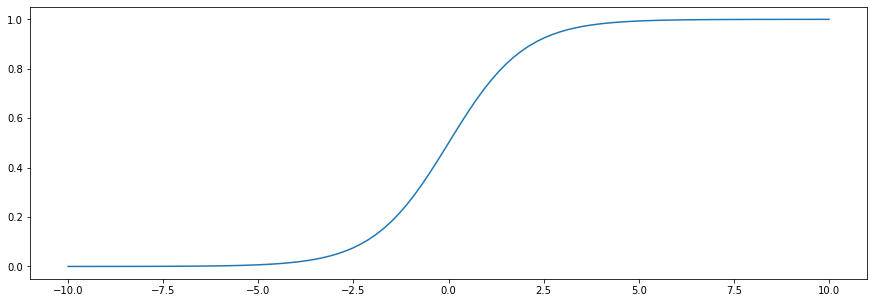

In [44]:
import utils
utils.plot_sigmoid()

For classification, a threshold is needed. Usually, it is set to be 0.5 and this value corresponds to a dot product between $\theta^Tx^{(i)} = 0$. So whenever the dot product is greater or equal than zero, the prediction is positive, and whenever the dot product is less than zero, the prediction is negative. 

$$
\text{sentiment} = \left\{\begin{matrix}
\color{green}{\text{positive}} & \theta^Tx^{(i)} \ge 0\\ 
\color{red}{\text{negative}} & \theta^Tx^{(i)} \lt 0
\end{matrix}\right.
$$

So let's look at an example in the context of tweets and sentiment analysis. Look at the following tweet. 

> @YMourri @AndrewYNg tuning GREAT AI model https://deeplearning.ai!!!

After a preprocessing, we end up with a list like this. 

```
Tweet = ['tun', 'great', 'ai', 'model']
```

Note that some elements are deleted, everything is in lowercase and the word tuning is reduced to its stem "tun". Then we are able to extract features given a frequencies dictionary and arrive at a vector similar to the following. Consider using a bias units as below, and two features that are the sum of positive and negative frequencies of all the words in your processed tweets. 

$$
x^{(i)} =
\left [
\begin{matrix}
1  \\
3476 \\
245 \\
\end{matrix} 
\right ] \ \ \ \ \ \ \ \ \ \ \ \ \ \ \theta = \left [
\begin{matrix}
0.00003 \\
0.00150 \\
-0.00120 \\
\end{matrix} 
\right ]
$$

Now assuming that we have an optimum sets of parameters $\theta$, we are able to get the value of the sigmoid function, in this case, equal to 4.92, and finally, predict a positive sentiment. 

In [64]:
def sigmoid(X, theta):
    return 1./(1+np.exp(-np.dot(theta.T, X)))

X = np.array([1, 3476, 245])
theta = np.array([0.00003, 0.00150, -0.00120])
print('\u03B8x⁽ᶦ⁾ = {}'.format(np.dot(theta.T, X)))
print('Sigmoid = {}'.format(sigmoid(X, theta)))

θx⁽ᶦ⁾ = 4.920030000000001
Sigmoid = 0.9927539762129266


# Logistic Regression: Training

In the previous section, we learned how to classify whether a tweet has a positive sentiment or negative sentiment, using a theta that was given to us. Now, we learn theta from scratch. 

To train a logistic regression classifier, iterate until finding the set of parameters $\theta$ that minimizes the cost function. Let us suppose that the loss only depends on the parameters $\theta_1$ and $\theta_2$. We would have a cost function that looks like the contour plot shown on the left of the image below. On the right, we can see the evolution of the cost function as we iterate. First, we initialize the parameters $\theta$. Then, we update the $\theta$ values in the direction of the gradient of the cost function. After many iterations, we derive to a point near to the optimum costs, and thus we can end the training. 

<img src="images/train_rl.svg" width="70%"/>

In order to train the classifier, we perform the following pipeline illustred below. First, we initialize the parameter vector $\theta$. Then we use the logistic function to get values for each of the observations. After, we are able to calculate the gradients of the cost function and update the parameters. Finally, we compute the cost $J$ and determine if more iterations are needed according to a stop-parameter or maximum number of iterations. This algorithm is known as **gradient descent**. Now, that we have the $\theta$ variable, we evaluate it, meaning we evaluate the classifier. 

<img src="images/gradient_descent.svg" width="90%"/>

In [45]:
import utils
import numpy as np

def sigmoid(X, theta):
    return 1. / (1 + np.exp(-np.dot(X, theta)))
    
def training(X, Y, lr=1e-8, epochs=10):
    theta = np.array([1, np.random.rand()*5e-3, np.random.rand()*1e-4]).reshape(3, 1)
    for e in range(epochs):
        h = sigmoid(X, theta)
        J = -1./X.shape[0] * (np.dot(Y.T, np.log(h)) + np.dot((1-Y).T, np.log(1 - h)))
        theta = theta - lr/X.shape[0] * (np.dot(X.T, h-Y))
        print('Epoch {} - Cost: {}'.format(e+1, J.squeeze()))
        
X, Y = utils.load_examples()
training(X, Y)

Epoch 1 - Cost: 0.8410897842728332
Epoch 2 - Cost: 0.822010091533894
Epoch 3 - Cost: 0.8034467007140831
Epoch 4 - Cost: 0.7854018751562352
Epoch 5 - Cost: 0.7678763827613204
Epoch 6 - Cost: 0.7508694539886824
Epoch 7 - Cost: 0.734378766722554
Epoch 8 - Cost: 0.7184004609890954
Epoch 9 - Cost: 0.702929184765808
Epoch 10 - Cost: 0.6879581701026727


# Logistic Regression: Testing

Now that we have data, we use this data to predict new data points. For example, given a new tweet, we use this data to say whether this tweet is positive or negative. In doing so, we analyze whether the model generalizes well or not. 

In order to do this, we need $X_{val}$ and $Y_{val}$ (the validation sets), and $\theta$ (the optimum parameters from training set). Thus, we compute the sigmoid function for $X_{val}$ with parameters $\theta$, and evaluate if each value of $h(X_{val}\theta)$ is greater than or equal to a threshold value (often set to 0.5, thus, $\text{pred}_{pos} = h(X_{val}\theta) \ge 0.5$). For example, consider the vector, 0.3, 0.8, 0.5, etc., up to the number of examples from the validation set, we assert if each of its components is greater than or equal to 0.5. If so, we assign a value of one to the resulting vector, and zero otherwise. At the end, we have a vector populated with zeros and ones indicating predicted negative and positive examples, respectively, as show below. 

$$
x^{(i)} =
\left [
\begin{matrix}
0.3  \\
0.8 \\
0.5 \\
\ldots \\
h_m
\end{matrix} 
\right ] \ge 0.5 = \left [
\begin{matrix}
0.3 \ge 0.5  \\
0.8 \ge 0.5 \\
0.5 \ge 0.5 \\
\ldots \\
\text{pred}_m \ge 0.5
\end{matrix} 
\right ] = \left [
\begin{matrix}
0  \\
1 \\
0 \\
\ldots \\
\text{pred}_m
\end{matrix} 
\right ]
$$


After building the predictions vector, we can compute the accuracy of the model over the validation sets. To do so, we compare the predictions with the true value for each observation from the validation data. If the values are equal and the prediction is correct, we get a value of 1 and 0 otherwise. For instance, consider the vectors below, if the prediction is correct, like in the case where the prediction and the label are both equal to 0, the resulting vector will set a value equal to 1 in the first position. Conversely, if the second prediction is not correct, because the prediction and label disagree, the vector will set a value of 0 in the second position, and so on.

$$
\left [
\begin{matrix}
0  \\
1 \\
1 \\
\ldots \\
\text{pred}_m
\end{matrix} 
\right ] == \left [
\begin{matrix}
0  \\
0 \\
1 \\
\ldots \\
Y_{val_m}
\end{matrix} 
\right ] = \left [
\begin{matrix}
1  \\
0 \\
1 \\
\ldots \\
\text{pred}_m == Y_{val_{m}}
\end{matrix} 
\right ]
$$

After having compared the values of every prediction with the true labels of the validation set, we can get the total times that the predictions were correct by summing up the vector of the comparisons. Finally, we divide that number over the total number $m$ of observations from the validation set. This **accuracy** metric (ACC) gives an estimate of the times that the logistic regression will correctly work on unseen data. 

$$ 
ACC = \sum\limits_{i=1}^m \frac{(\text{pred}^{(i)} == y_{val}^{(i)})}{m}
$$

So, if the accuracy is equal to 0.5, it means that 50 percent of the time, the model is expected to work well. For instance, if the $Y_{val}$ and prediction vectors for five observations look like the example below, we compare each of their values and determine whether they match or not. After that, we have the following vector with a single 0 in the third position where the prediction and the label disagree. Next, we sum the number of times that the predictions were right and divide that number by the total number of observations in the validation sets. In the example, we get an accuracy equal to 80 percent. 

$$
Y_{val} = \left [
\begin{matrix}
0  \\
1 \\
1 \\
0 \\
1
\end{matrix} 
\right ] \ \ \ \ \ \ \text{pred} = \left [
\begin{matrix}
0  \\
1 \\
0 \\
0 \\
1
\end{matrix} 
\right ] \ \ \ \ \rightarrow \ \ \ \ \ (Y_{val} == \text{pred}) = \left [
\begin{matrix}
1  \\
1 \\
0 \\
1 \\
1
\end{matrix} 
\right ] \ \ \ \ \ \rightarrow \ \ \ \ \ ACC = \frac{4}{5} = 0.8
$$


Congratulations on finishing the first week of this specialization. You learned many concepts this week. The first thing you learned is you learned how to preprocess a text. You learned how to extract features from that text. You learned how to use those extracted features and train a model using those. Then you learned how to test your model. In this week's programming exercise, you're going to get a chance to implement all these concepts that we spoke about. Feel free to go ahead and do the programming exercise. There's also an optional video at the end of this week which covers the intuition behind the cost function for logistic regression. If you don't want to watch that video, feel free to go to next week, where you will learn about a new classification algorithm known as naive Bayes.

In [48]:
import numpy as np
def accuracy(y_pred, y):
    acc = 1./len(y_pred) * np.sum(y_pred == y)
    return acc
    
y_pred = np.array([1, 1, 1, 0, 0, 1, 0, 0, 0, 0])
y = np.array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1])
print('Accuracy: {}'.format(accuracy(y_pred, y)))

Accuracy: 0.9


# Logistic Regression: Cost Function

Now, we learn about the intuition behind the logistic regression cost function. Specifically, we understand why the cost function is designed that way and what happens when we predict the true label and when we predict the wrong label.

Let's have a look now at the equation of the cost function. First, look at the left hand side of the equation where we find a sum over the variable $m$, which is just the number of training examples in training set. This indicates that we sum over the cost of each training example and perform the average. The minus sign ensures that the overall costs will always be a positive number. Inside the square brackets, the equation has two terms that are added together. To consider what each of these terms contribute to the cost function for each training example, let's have a look at each of them separately. 

$$
J(\theta) = -\frac{1}{m} \sum\limits_{i=1}^{m} [\color{blue}{y^{(i)} \log h(x^{(i)}, \theta)} + \color{red}{(1 - y^{(i)}) \log (1 - h(x^{(i)}, \theta))}]
$$

The term on the left (in blue) is the product of $y^{(i)}$, which is the label for each training example, by the log of the prediction, which is the logistic regression function applied to each training example (represented as $h(x^{(i)}, \theta)$. Now, consider the case when the label is $y^{(i)}=0$. In this case, the function $h$ can return any value, and the entire term will be 0 because 0 times anything is just 0. What about the case when the label is 1? If the prediction is close to 1, then the log of the prediction will be close to 0, because the $\log 1 = 0$, and the product will also be near 0. If the label is 1, and the prediction is close to 0, then this term blows up and approaches negative infinity. Intuitively, we can see that this is the relevant term in the cost function when the label is 1. When the prediction is close to the label value, the loss is small, and when the label and prediction disagree, the overall cost goes up.

|$y^{(i)}$ | $h(x^{(i)}, \theta)$ | result |
| :------: | :-----------------: | :----- |
| &nbsp;&nbsp;&nbsp;&nbsp;0&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;any&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;0   |
|    1     |         0.99        |   ~0   |
|    1     |         ~0          |  -inf  |

Now consider the term on the right hand side (in red) of the cost function equation, in this case, if the label is 1, then the $(1 - y)$ term goes to 0. So any value returned by the logistic regression function will result in a 0 for the entire term, because again, 0 times anything is just 0. If the label is 0, and the logistic regression function returns a value close to 0, then the products in this term will again be close to 0. If on the other hand the label is 0 and the prediction is close to 1, then the log term will blow up and the overall term will approach to negative infinity.

|$y^{(i)}$ | $h(x^{(i)}, \theta)$ | result |
| :------: | :-----------------: | :----- |
| &nbsp;&nbsp;&nbsp;&nbsp;1&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;any &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; | &nbsp;0   |
|    0     |         0.01        |   ~0   |
|    0     |         ~1          |  -inf  |

From this exercise, we can see now that there is one term in the cost function that is relevant when the label is 0 (in red), and another that is relevant when the label is 1 (in blue). In each of these terms, we take the log of a value between 0 and 1, which will always return a negative number. So, the minus sign out front ensures that the overall cost will always be a positive number. 

Now, let's have a look at what the cost function looks like for each of the labels. First, we are going to look at the loss when the label is 1 (blue curve). In the plot below, the prediction value is on the horizontal axis and the cost associated with a single training example is on the vertical axis. In this case $J(\theta)$ simplifies to just $-\log h(x^{(i)}, \theta)$. When the prediction is close to 1, the loss is close to 0. Because the prediction agrees well with the label. When the prediction is close to 0, the loss approaches infinity, because the prediction and the label disagree strongly. 

<img src="images/logistic_terms.svg" width="60%"/>

The opposite is true when the label is 0. In this case $J(\theta)$ reduces to just $-\log (1 - h(x^{(i)}, \theta))$. Now when the prediction is close to 0, the loss is also close to 0. When the prediction is close to 1, the loss approaches infinity.